# Predict travel insurance claim (Yes or No)

About this Dataset
A third-party travel insurance servicing company that is based in Singapore.

The attributes:

Target: Claim Status (Claim.Status)
Name of agency (Agency)
Type of travel insurance agencies (Agency.Type)
Distribution channel of travel insurance agencies (Distribution.Channel)
Name of the travel insurance products (Product.Name)
Duration of travel (Duration)
Destination of travel (Destination)
Amount of sales of travel insurance policies (Net.Sales)
Commission received for travel insurance agency (Commission)
Gender of insured (Gender)
Age of insured (Age)

In [2]:
import sys
print(sys.version)
import platform
print(platform.python_version())

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
3.7.6


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

In [4]:
df = pd.read_csv("travel insurance.csv",delimiter=',')

In [5]:
df.head(20)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


## Clean data

In [7]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [8]:
df['Gender'].isnull().sum()/df['Gender'].isnull().count()

0.7122982661150239

In [9]:
df['Gender'].fillna('Not specified',inplace=True)

In [10]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [11]:
def cleanYesNo(s):
    if s == "Yes":
        return 1
    elif s == "No":
        return 0

df["Claim0"] = df.loc[:,'Claim'].apply(cleanYesNo)

In [12]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim0
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981,0.014639
std,101.791566,48.845637,19.804388,14.017010,0.120102
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.530000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000


In [13]:
df[df['Duration']<0]
# number of clumns for negative duration is only 5. Then it is safe to exclude these rows.

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim0
14943,JZI,Airlines,Online,Basic Plan,No,-2,BANGLADESH,22.0,7.7,M,118,0
52587,JZI,Airlines,Online,Basic Plan,No,-1,MALAYSIA,18.0,6.3,Not specified,118,0
52588,JZI,Airlines,Online,Basic Plan,No,-1,BRUNEI DARUSSALAM,18.0,6.3,Not specified,118,0
56668,JZI,Airlines,Online,Basic Plan,No,-1,INDONESIA,18.0,6.3,Not specified,118,0
59528,JZI,Airlines,Online,Basic Plan,No,-1,CHINA,22.0,7.7,Not specified,118,0


In [14]:
df[df['Age']>100]
# Age 118 seems a default value, beside the age 118, other column data seems valid. There are 984 rows of such data.

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim0
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,Not specified,118,0
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,M,118,0
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,F,118,0
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,M,118,0
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,M,118,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,No,2,INDIA,31.0,12.40,M,118,0
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,M,118,0
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,M,118,0
63182,JWT,Airlines,Online,Value Plan,No,21,INDIA,39.0,15.60,F,118,0


In [15]:
df[df['Net Sales']<0]

# Although the sales are negative, but the absolute value seems larger than the commision value. 
# The negative sales might be valid data, if we just take the absolute value.

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim0
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,Not specified,32,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,Not specified,32,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,Not specified,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...
57991,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,6,AUSTRALIA,-9.9,5.94,Not specified,31,0
57992,RAB,Airlines,Online,Value Plan,No,9,BRUNEI DARUSSALAM,-15.0,6.00,Not specified,46,0
57993,C2B,Airlines,Online,Annual Silver Plan,No,386,SINGAPORE,-161.0,40.25,F,28,0
57994,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,28,MALAYSIA,-29.7,17.82,Not specified,31,0


In [16]:
df_neg_sales=df[df['Net Sales']<0]

In [17]:
df_neg_sales['ratio']=df['Commision (in value)']/df_neg_sales['Net Sales']

C:\Users\edward chen\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_neg_sales.describe()
# From the ratio value, we can see that there is no Net Sales (absolute value) less than Commision value. 

,Duration,Net Sales,Commision (in value),Age,Claim0,ratio
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,82.595870,-60.955796,24.102847,40.575221,0.004425,-0.384166
std,81.950117,52.379164,26.165940,15.407688,0.066421,0.261483
min,0.000000,-389.000000,0.000000,0.000000,0.000000,-0.650189
25%,28.000000,-79.200000,0.000000,31.000000,0.000000,-0.600000
50%,55.000000,-49.500000,17.820000,36.000000,0.000000,-0.600000
75%,109.750000,-29.000000,39.487500,47.000000,0.000000,-0.000000
max,431.000000,-0.070000,178.200000,118.000000,1.000000,-0.000000


In [19]:
df.count()

Agency                  63326
Agency Type             63326
Distribution Channel    63326
Product Name            63326
Claim                   63326
Duration                63326
Destination             63326
Net Sales               63326
Commision (in value)    63326
Gender                  63326
Age                     63326
Claim0                  63326
dtype: int64

In [20]:
df_clean=df[~df['Duration']<0]

In [21]:
df_clean['Age'].median()
# we can replace the age 118 with median value

36.0

In [22]:
MaxAge=df['Age'].max()
MedAge=df['Age'].median()

In [23]:
def replaceAge(s):
    if s==MaxAge:
        return MedAge
    else:
        return s

df_clean['Age_clean']=df_clean.loc[:,'Age'].apply(replaceAge)

C:\Users\edward chen\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
df_clean.describe()

,Duration,Net Sales,Commision (in value),Age,Claim0,Age_clean
count,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000
mean,49.321063,40.703684,9.810225,39.963819,0.014640,38.696025
std,101.794595,48.847203,19.805152,14.000402,0.120107,10.024666
min,0.000000,-389.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000,35.000000
50%,22.000000,26.650000,0.000000,36.000000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000,42.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000,88.000000


In [25]:
df_clean['Net Sales (absolute value)']=abs(df_clean['Net Sales'])

C:\Users\edward chen\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_clean.describe()

,Duration,Net Sales,Commision (in value),Age,Claim0,Age_clean,Net Sales (absolute value)
count,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000,63321.000000
mean,49.321063,40.703684,9.810225,39.963819,0.014640,38.696025,42.009034
std,101.794595,48.847203,19.805152,14.000402,0.120107,10.024666,47.729220
min,0.000000,-389.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000,35.000000,18.500000
50%,22.000000,26.650000,0.000000,36.000000,0.000000,36.000000,27.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000,42.000000,49.500000
max,4881.000000,810.000000,283.500000,118.000000,1.000000,88.000000,810.000000


In [27]:
print("Claimed")
print(df_clean[df_clean["Claim0"] == 1]["Claim0"].count())
print("Not Claimed")
print(df_clean[df_clean["Claim0"] == 0]["Claim0"].count())

Claimed
927
Not Claimed
62394


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Agency                      63321 non-null  object 
 1   Agency Type                 63321 non-null  object 
 2   Distribution Channel        63321 non-null  object 
 3   Product Name                63321 non-null  object 
 4   Claim                       63321 non-null  object 
 5   Duration                    63321 non-null  int64  
 6   Destination                 63321 non-null  object 
 7   Net Sales                   63321 non-null  float64
 8   Commision (in value)        63321 non-null  float64
 9   Gender                      63321 non-null  object 
 10  Age                         63321 non-null  int64  
 11  Claim0                      63321 non-null  int64  
 12  Age_clean                   63321 non-null  float64
 13  Net Sales (absolute value)  633

In [29]:
cols=['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Commision (in value)','Gender','Age_clean','Claim0','Net Sales (absolute value)']

In [30]:
df_clean_shortlist=df_clean[cols]

In [31]:
df_clean_shortlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Agency                      63321 non-null  object 
 1   Agency Type                 63321 non-null  object 
 2   Distribution Channel        63321 non-null  object 
 3   Product Name                63321 non-null  object 
 4   Duration                    63321 non-null  int64  
 5   Destination                 63321 non-null  object 
 6   Commision (in value)        63321 non-null  float64
 7   Gender                      63321 non-null  object 
 8   Age_clean                   63321 non-null  float64
 9   Claim0                      63321 non-null  int64  
 10  Net Sales (absolute value)  63321 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 5.8+ MB


## Data visualization

### catter plot: agency vs. claim

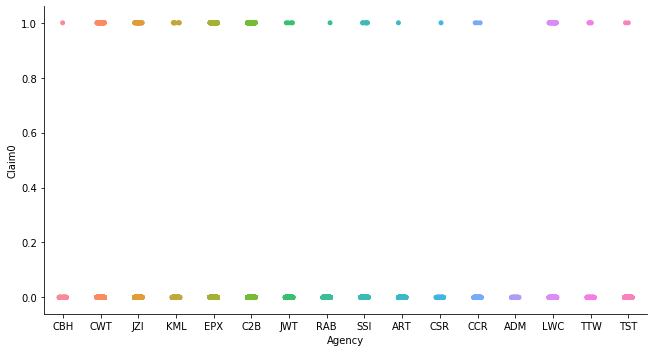

In [32]:
# catter plot: agency vs. claim
g = sns.catplot(x="Agency",y = "Claim0", data=df_clean_shortlist)
g.fig.set_size_inches(10,5)

In [33]:
df_numerical=df_clean_shortlist._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Duration                    63321 non-null  int64  
 1   Commision (in value)        63321 non-null  float64
 2   Age_clean                   63321 non-null  float64
 3   Claim0                      63321 non-null  int64  
 4   Net Sales (absolute value)  63321 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.4 MB


### histogram for the numerical feature

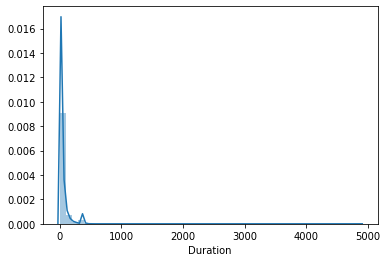

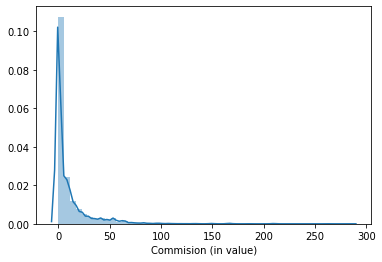

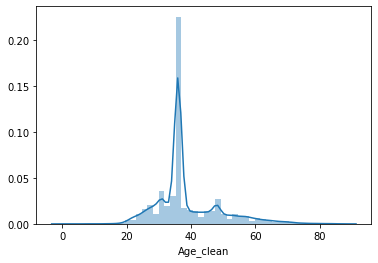

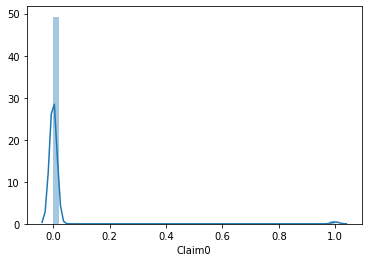

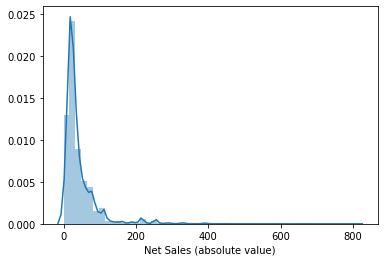

In [34]:
# histogram for the numerical feature
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.distplot(df_numerical[col])

### bar chart for Destination with claim value of yes or 1

In [35]:
claimeddata = df_clean_shortlist[df_clean_shortlist["Claim0"]==1]

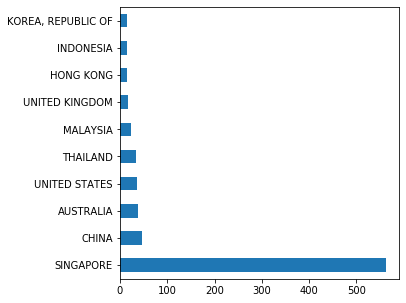

In [36]:
# bar chart for Destination with claim value of yes or 1
claimeddata['Destination'].value_counts().head(10).plot(kind='barh', figsize=(5,5))

In [37]:
cols=['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination',
      'Commision (in value)','Gender','Age_clean','Claim0','Net Sales (absolute value)']



### bar chart for Agency with claim value of yes or 1

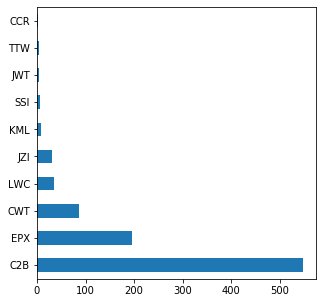

In [38]:
# bar chart for Agency with claim value of yes or 1
claimeddata['Agency'].value_counts().head(10).plot(kind='barh', figsize=(5,5))

### bar chart for Product Name with claim value of yes or 1

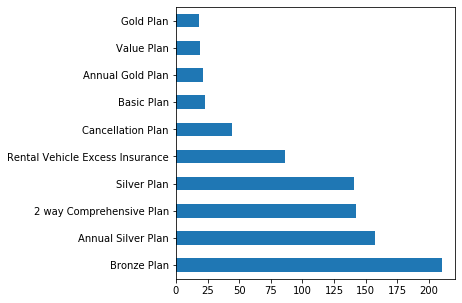

In [39]:
# bar chart for Product Name with claim value of yes or 1
claimeddata['Product Name'].value_counts().head(10).plot(kind='barh', figsize=(5,5))

### bar chart between all data and claim data for Agency

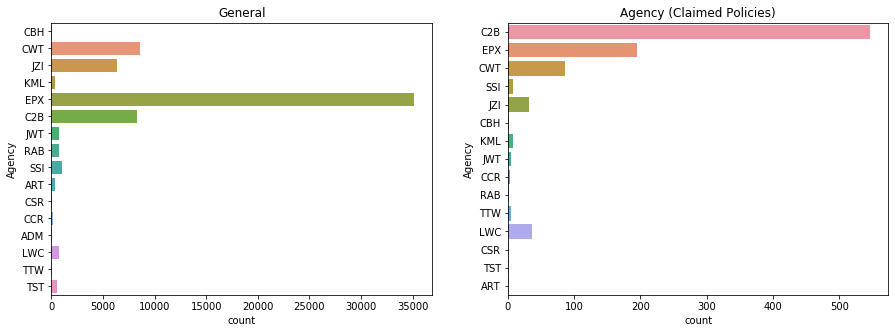

In [40]:
# bar chart between all data and claim data for Agency
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
axes[0].set_title('General')
axes[1].set_title('Agency (Claimed Policies)')
sns.countplot(y="Agency", data=df_clean_shortlist, ax = axes[0])
sns.countplot(y="Agency", data=claimeddata, ax = axes[1])

### heatmap for numerical features

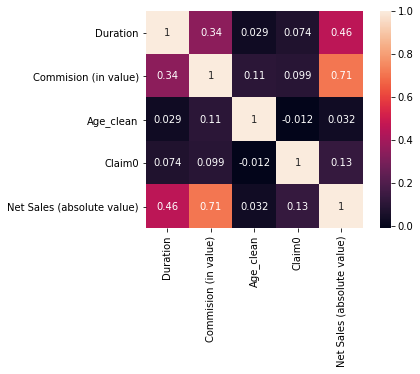

In [41]:
# heatmap for numerical features
sns.heatmap(df_clean_shortlist.corr(), square=True,annot=True)

### pivot table for Agency vs. Agency Type

In [42]:
# pivot table for Agency vs. Agency Type
pd.crosstab(df_clean_shortlist['Agency'],df_clean_shortlist['Agency Type'],margins=True)

Agency Type,Airlines,Travel Agency,All
Agency,,,
ADM,0,82,82
ART,331,0,331
C2B,8267,0,8267
CBH,0,101,101
CCR,0,194,194
CSR,0,86,86
CWT,0,8580,8580
EPX,0,35119,35119
JWT,749,0,749


### Claim percentage versus agency with respect to Commission

In [43]:
table1=pd.crosstab(df_clean_shortlist['Agency'],df_clean_shortlist['Claim0'],margins=True)
print(type(table1))
table1.drop(['All'],axis=1,inplace=True)
# table1=(table1.div(table1['All'],axis=0))*100

table1['mean commision']=df_clean_shortlist.groupby('Agency')['Commision (in value)'].mean()
table1

<class 'pandas.core.frame.DataFrame'>


Claim0,0,1,mean commision
Agency,,,
ADM,82,0,38.254878
ART,330,1,10.553927
C2B,7720,547,20.533124
CBH,100,1,10.030693
CCR,191,3,10.313351
CSR,85,1,10.824767
CWT,8494,86,32.380615
EPX,34924,195,0.000000
JWT,745,4,21.640053


In [44]:
table2=pd.crosstab(df_clean_shortlist['Agency'],df_clean_shortlist['Claim0'],margins=True)

#table2.drop('All',axis=1,inplace=True)
table1=(table1.div(table2['All'],axis=0))*100

table1['mean commision']=df_clean_shortlist.groupby('Agency')['Commision (in value)'].mean()
table1

Claim0,0,1,mean commision
Agency,,,
ADM,100.000000,0.000000,38.254878
ART,99.697885,0.302115,10.553927
C2B,93.383331,6.616669,20.533124
CBH,99.009901,0.990099,10.030693
CCR,98.453608,1.546392,10.313351
CSR,98.837209,1.162791,10.824767
CWT,98.997669,1.002331,32.380615
EPX,99.444745,0.555255,0.000000
JWT,99.465955,0.534045,21.640053


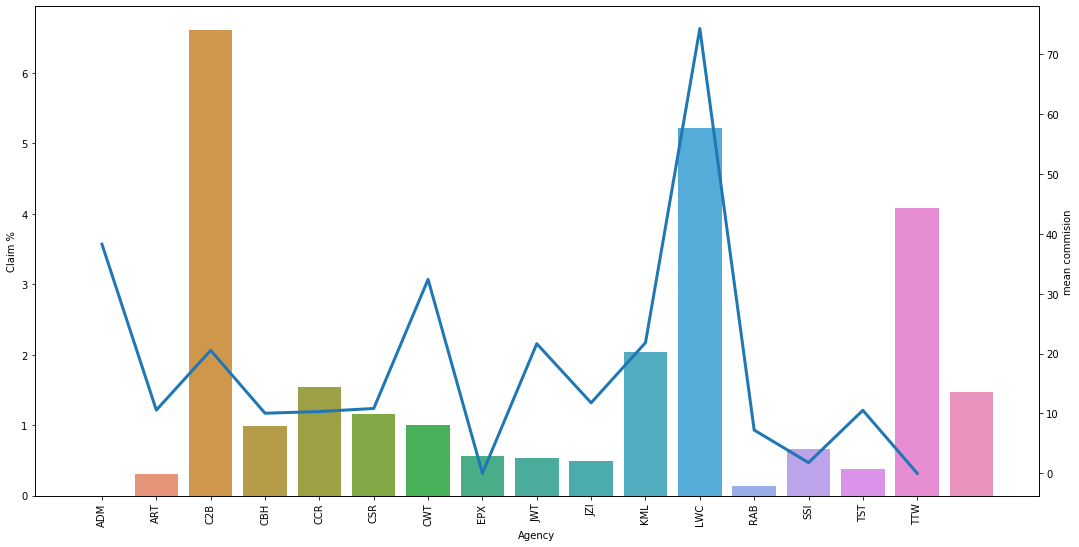

In [45]:
fig,ax1=plt.subplots(figsize=(18,9))
sns.barplot(table1.index,table1[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Claim %')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3)

### Claim percentage versus Product with respect to Commission

In [46]:
table3=pd.crosstab(df_clean_shortlist['Product Name'],df_clean_shortlist['Claim0'],margins=True)
table4=pd.crosstab(df_clean_shortlist['Product Name'],df_clean_shortlist['Claim0'],margins=True)
table3=(table3.div(table4['All'],axis=0))*100

table3['mean commision']=df_clean_shortlist.groupby('Product Name')['Commision (in value)'].mean()
table3.drop('All',axis=1,inplace=True)
table3

Claim0,0,1,mean commision
Product Name,,,
1 way Comprehensive Plan,99.729811,0.270189,0.000000
2 way Comprehensive Plan,98.920809,1.079191,0.000000
24 Protect,100.000000,0.000000,8.511943
Annual Gold Plan,89.175258,10.824742,88.920619
Annual Silver Plan,88.966971,11.033029,56.985200
Annual Travel Protect Gold,90.000000,10.000000,161.536200
Annual Travel Protect Platinum,94.339623,5.660377,215.935849
Annual Travel Protect Silver,95.348837,4.651163,136.168837
Basic Plan,99.579063,0.420937,9.540126


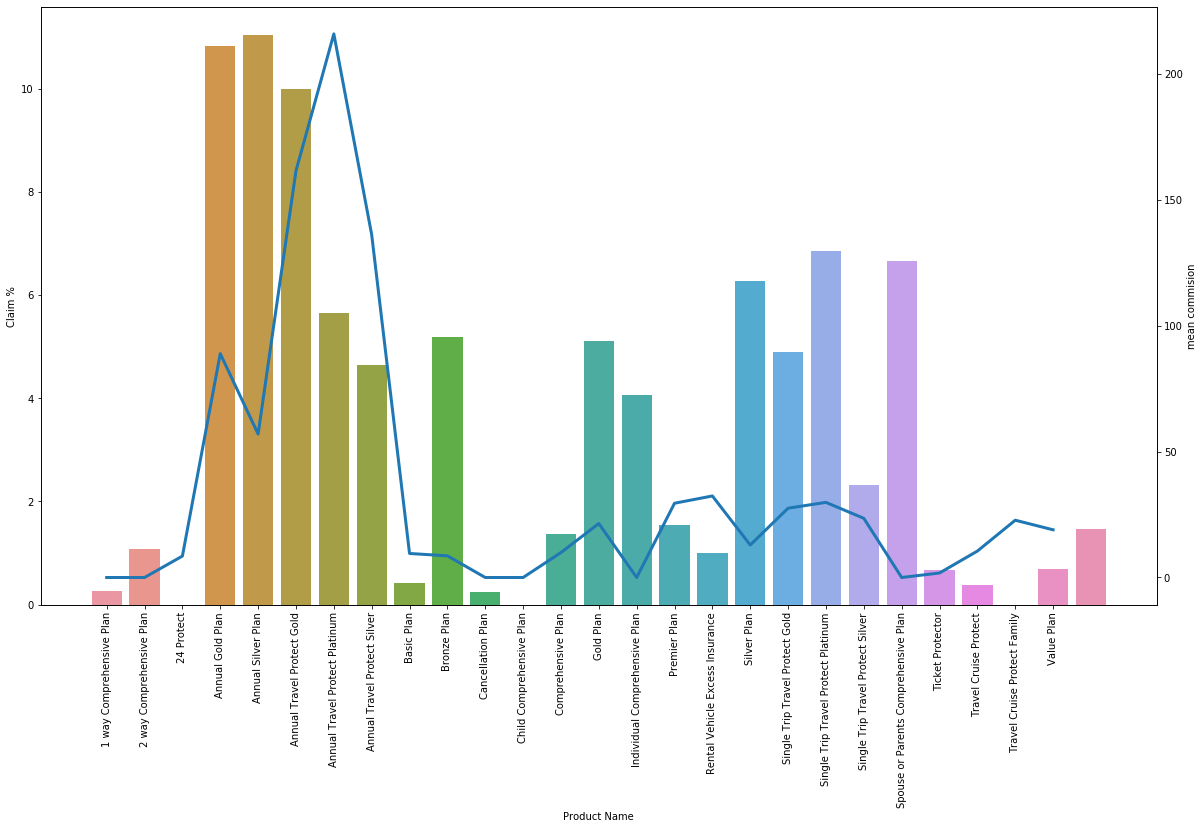

In [47]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(table3.index,table3[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Claim %')
ax2=ax1.twinx()
sns.lineplot(table3.index,table3['mean commision'],ax=ax2,linewidth=3)

### How does duration impact on the claim percentage?

In [48]:
tests=df_clean_shortlist.copy()
tests['Duration_label']=pd.qcut(df_clean_shortlist['Duration'],q=35)
table5=pd.crosstab(tests['Duration_label'],tests['Claim0'],normalize='index')
table5

Claim0,0,1
Duration_label,,
"(-0.001, 2.0]",0.997060,0.002940
"(2.0, 3.0]",0.992849,0.007151
"(3.0, 4.0]",0.995857,0.004143
"(4.0, 5.0]",0.991885,0.008115
"(5.0, 6.0]",0.990544,0.009456
"(6.0, 7.0]",0.993401,0.006599
"(7.0, 8.0]",0.988253,0.011747
"(8.0, 9.0]",0.988907,0.011093
"(9.0, 10.0]",0.984199,0.015801


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

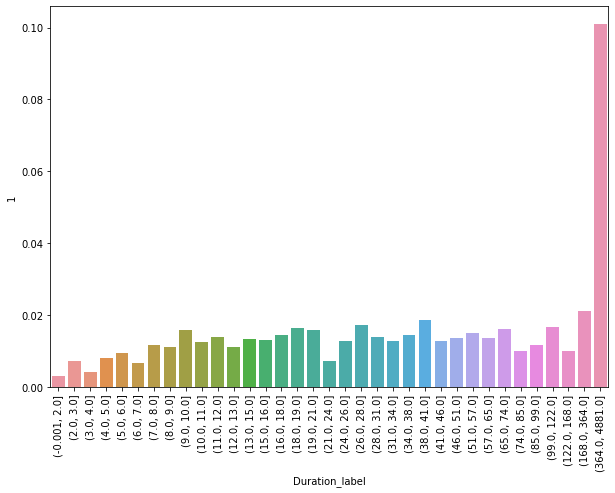

In [49]:
plt.figure(figsize=(10,7))
sns.barplot(table5.index,table5[1])
plt.xticks(rotation=90)

## Lets see which features are important for the prediction using Chi Square Test

In [50]:
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [51]:
X = df_clean_shortlist.drop(['Claim0'], axis=1)
ct = ChiSquare(df_clean_shortlist)
for c in X.columns:
    ct.TestIndependence(c, 'Claim0')

Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age_clean is IMPORTANT for Prediction
Net Sales (absolute value) is IMPORTANT for Prediction


In [52]:
df_final=df_clean_shortlist.drop(['Distribution Channel'],axis=1)

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Agency                      63321 non-null  object 
 1   Agency Type                 63321 non-null  object 
 2   Product Name                63321 non-null  object 
 3   Duration                    63321 non-null  int64  
 4   Destination                 63321 non-null  object 
 5   Commision (in value)        63321 non-null  float64
 6   Gender                      63321 non-null  object 
 7   Age_clean                   63321 non-null  float64
 8   Claim0                      63321 non-null  int64  
 9   Net Sales (absolute value)  63321 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.8+ MB


## Categorical features transform

In [54]:
y=df_final['Claim0']
X=df_final
X.drop('Claim0',axis=1,inplace=True)

In [55]:
X_dummy=pd.get_dummies(X,columns=['Agency','Agency Type','Gender','Product Name','Destination'],drop_first=True)

In [56]:
X_dummy.head(5)

,Duration,Commision (in value),Age_clean,Net Sales (absolute value),Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,186,9.57,81.0,29.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,9.57,71.0,29.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65,29.70,32.0,49.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60,23.76,32.0,39.6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,79,11.88,41.0,19.8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## oversampling
Oversampling methods should be performed in that the number of claimed policies is much less than non-claimed ones. So oversampling methods are used to address this issue.

In [57]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_dummy, y)

## train and test dataset split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

In [59]:
(unique, counts) = np.unique(y_train, return_counts=True)
(unique, counts)

(array([0, 1], dtype=int64), array([43585, 43766], dtype=int64))

# Modelling

## logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\edward chen\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
clf.score(X_train, y_train)

0.7638492976611602

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14854,  3955],
       [ 4969, 13659]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred, target_names = ["Claimed", "Non-claimed"]))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     18809
           1       0.78      0.73      0.75     18628

    accuracy                           0.76     37437
   macro avg       0.76      0.76      0.76     37437
weighted avg       0.76      0.76      0.76     37437



In [64]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf, X_train, y_train, cv=10)

C:\Users\edward chen\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\edward chen\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

In [65]:
cv_results['test_score']

array([0.75961538, 0.76428163, 0.75203205, 0.76393818, 0.76290784,
       0.76393818, 0.76130509, 0.76016027, 0.76370922, 0.76416714])

## Use SMOTE to do oversampling

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
smote = SMOTE(random_state=7)
X_ov, y_ov = smote.fit_resample(X_dummy, y)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, train_size=0.7, random_state=7)

## Random Forest, Decision Tree and Linear SVC

In [68]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
algo_dict = {'Random Forest Classifier':RandomForestClassifier(),'DecisionTreeClassifier':DecisionTreeClassifier(),'Linear SVC':LinearSVC()}


                
algo_name=[]
for i in algo_dict:
    algo_name.append(i)

for i in algo_dict.keys():
          
        algo = algo_dict[i]
        model = algo.fit(X_train, y_train)
        y_pred = model.predict(X_test)   
        print(i)
        print('Classification report'+'\n',classification_report(y_test, y_pred))
        print('Confusion matrix\n')
        print(confusion_matrix(y_test, y_pred))
        print('***'*30)

Random Forest Classifier
Classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18682
           1       0.98      0.98      0.98     18755

    accuracy                           0.98     37437
   macro avg       0.98      0.98      0.98     37437
weighted avg       0.98      0.98      0.98     37437

Confusion matrix

[[18274   408]
 [  304 18451]]
******************************************************************************************
DecisionTreeClassifier
Classification report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18682
           1       0.97      0.98      0.97     18755

    accuracy                           0.97     37437
   macro avg       0.97      0.97      0.97     37437
weighted avg       0.97      0.97      0.97     37437

Confusion matrix

[[18165   517]
 [  449 18306]]
***************************************************************

C:\Users\edward chen\Anaconda3\envs\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC
Classification report
               precision    recall  f1-score   support

           0       0.92      0.89      0.90     18682
           1       0.89      0.93      0.91     18755

    accuracy                           0.91     37437
   macro avg       0.91      0.91      0.91     37437
weighted avg       0.91      0.91      0.91     37437

Confusion matrix

[[16535  2147]
 [ 1384 17371]]
******************************************************************************************


## Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 3, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.808
Accuracy score (validation): 0.807

Learning rate:  0.1
Accuracy score (training): 0.808
Accuracy score (validation): 0.807

Learning rate:  0.25
Accuracy score (training): 0.808
Accuracy score (validation): 0.807

Learning rate:  0.5
Accuracy score (training): 0.811
Accuracy score (validation): 0.810

Learning rate:  0.75
Accuracy score (training): 0.818
Accuracy score (validation): 0.816

Learning rate:  1
Accuracy score (training): 0.816
Accuracy score (validation): 0.814



In [70]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 3, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)


print("Classification Report:\n")
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
print()

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     18682
           1       0.80      0.85      0.82     18755

    accuracy                           0.82     37437
   macro avg       0.82      0.82      0.82     37437
weighted avg       0.82      0.82      0.82     37437

Confusion Matrix:

[[14605  4077]
 [ 2797 15958]]



### apply gridsearch on gradient boosting classifier

In [71]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=GradientBoostingClassifier(),
        param_grid={
            'loss': ['deviance','exponential'],
            'max_depth': [2, 3, 4, 5],
            'max_features': [2,'auto','sqrt','log2','None']
        },
        cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# scoring parameter: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [73]:
# grid_result = gsc.fit(X_train, y_train)
# best_params = grid_result.best_params_
# print(best_params)

In [96]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(alg, X, y, X_test, y_test,performCV=True, printFeatureImportance=True, cv_folds=5, top_important_features=10):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    y_pred = alg.predict(X_test)
    test_predprob = alg.predict_proba(X_test)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
#     print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
    print('Classification report'+'\n',classification_report(y_test, y_pred))
    print('Confusion matrix\n')
    print(confusion_matrix(y_test, y_pred))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, test_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,X.columns).nlargest(top_important_features).sort_values(ascending=True)
        feat_imp.plot(kind='barh', title='Feature Importances')
        plt.xlabel('Feature Importance Score')

In [81]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features='auto', max_depth = 5, random_state = 0)


Model Report
Classification report
               precision    recall  f1-score   support

           0       0.95      0.90      0.93     18682
           1       0.90      0.96      0.93     18755

    accuracy                           0.93     37437
   macro avg       0.93      0.93      0.93     37437
weighted avg       0.93      0.93      0.93     37437

Confusion matrix

[[16783  1899]
 [  817 17938]]
AUC Score (Train): 0.970732
CV Score : Mean - 0.9693567 | Std - 0.002701534 | Min - 0.9643292 | Max - 0.9724526


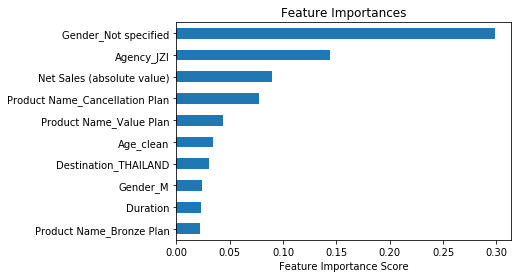

In [97]:
modelfit(gb, X_train, y_train, X_test, y_test)

## XGBOOST

In [77]:
import xgboost as xgb


Model Report
Classification report
               precision    recall  f1-score   support

           0       0.95      0.90      0.93     18682
           1       0.90      0.96      0.93     18755

    accuracy                           0.93     37437
   macro avg       0.93      0.93      0.93     37437
weighted avg       0.93      0.93      0.93     37437

Confusion matrix

[[16783  1899]
 [  817 17938]]
AUC Score (Train): 0.970732
CV Score : Mean - 0.9693567 | Std - 0.002701534 | Min - 0.9643292 | Max - 0.9724526


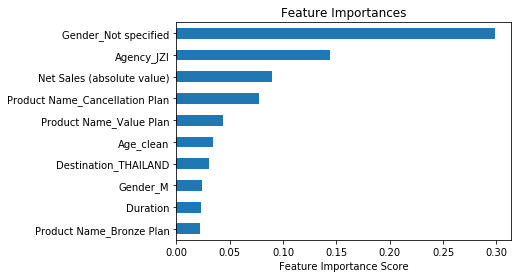

In [98]:
xgbst = xgb.XGBClassifier()
modelfit(gb, X_train, y_train, X_test, y_test)